# Astronomy 8824 - Numerical and Statistical Methods in Astrophysics
#### Paul Martini, The Ohio State University
#### Numerical Methods Topic I. Integration

This lecture is based on notes from David Weinberg with modifications and additions by Paul Martini.
David's original notes are available from his website: http://www.astronomy.ohio-state.edu/~dhw/A8824/index.html

#### Background reading: 
- Numerical Recipes, Chapter 4

In [1]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# matplotlib settings 
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

### Numerical Integration and Quadrature

The term quadrature in mathetmatics refers to the determination of the area. This dates to ancient times, when mathematicians treated the determination of the area as equivalent to the construction of a square of the same area. As integration determines the area under a curve, quadrature is still used as a term for numerical integration.

### Connection to Differentiation

The solution of integrals and the solution of derivatives have deep connections, and the numerical methods to solve both integrals and differential equations are very similar. For example the solution of 
$$
I=\int_a^b f(x) dx.
$$
is equivalent to solving the ordinary differential equation
$$
{dy \over dx} = f(x)
$$
with boundary condition $y(a)=0$ for $y(b)$.

And in some cases, methods for numerical integration may be used to solve differential equations (and vice versa). 

For example, consider the case
$$
f(x) = m x + c
$$

$$
I = \int^b_a f(x) dx = \int^b_a (m x + c) dx = {m \over 2} x^2 + c x |^b_a
$$
and compare this to  $I \equiv y(b)$ when $y(a) = 0$. In this case:
$$
{dy \over dx} = f(x) = m x + c
$$
$$
y = \int {dy \over dx} dx = \int (m x + c) dx = {1 \over 2} m x^2 + cx
$$
If the boundary condition $y(a) = 0$, then 
$$
y(b) = {1 \over 2} m b^2 + c b = I.
$$ 


#### Euler Method

The simplest method is the Euler Method: 
$$
S^{Eul}_N = \sum_{i=1}^{N} f(x_i) h_N,
$$
where $N$ is the number of (equal-sized) integration steps and
$$
h_N = {b-a \over N},\qquad x_i = a + (i-1)h_N.
$$

This is a bad method, The error per step is $O(h^2)$ and the error of the integral is $O(h)$.  It can drift systematically from the correct result.

Here is a geometric example for the simple function 
$$
I = \int^5_1 x^2 dx
$$ 
where we know the exact solution is 
$$
F(x) = {x^3 \over 3} |^5_1 = {125 \over 3} - {1 \over 3} = 41.33333
$$

Euler method evaluation with 4 steps 30.0000


<BarContainer object of 4 artists>

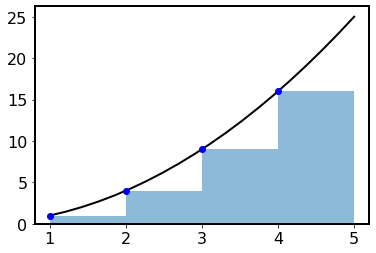

In [31]:
def func(x):
    return x*x

a = 1
b = 5

# Smooth plot
xs = np.linspace(a, b, 50)
ys = func(xs)

# Euler with 4 steps
nstep = 4
hstep = (b-a)/nstep
x = np.linspace(a, b-hstep, nstep)
y = func(x)
print("Euler method evaluation with {} steps {:.4f}".format(nstep, np.sum(y)*hstep))

# Plot
plt.plot(xa, ya, 'k')
plt.plot(x, y, 'bo')
plt.bar(x, y, width=hstep, align='edge', ecolor='blue', alpha=.5)

### Newton-Cotes formulas

Newton-Cotes formulas are a class of formulas for numerical integration that involve the evaluation of the function at equally spaced points. These are split into two varieties: closed formulas that include the end points of the integral, and open formulas that do not. They are named after Isaac Newton and Roger Cotes. 


#### Trapezoidal Rule

$\newcommand{\half}{{\textstyle{1\over2}}}$

The Trapezoidal Rule is: 
$$
\int^{x_2}_{x_1} f(x) dx = \left[ \half f_1 + \half f_2 \right] h + O(h^3 f'') 
$$
and is known as a two-point function. It perform linear fit to the function, and is much better than the Euler method. Note that the error in the method depends on the stepsize as $h^3$ and the derivative $f''$, although the coefficient is not specified. This method will be exact for 1st order (linear) functions with $f'' = 0$. 

The extended version of the Trapezoidal Rule is: 

$$
S^{Trap}_N =
  \sum_{i=1}^{N} \left[{1 \over 2}f(x_i) + {1\over 2}f(x_{i+1})\right] h_N.
$$

The Trapezoidal Rule can also be written:
$$
S^{Trap}_N = \sum_{i=1}^N \left[\half f(x_i) + \half f(x_{i+1})\right] h_N =
    \half\left[f(x_1)+f(x_{N+1})\right]h_N + \sum_{i=2}^N f(x_i) h_N,
$$
so it requires no more function calls than the Euler Method.

It is also straightforward to conduct automatic tolerance control by continuing to double $N$ and checking if 
$|S_N/S_{N/2}-1| < {\tt TOL}$.

#### Simpson's Rule 

$\newcommand{\third}{{\textstyle{1\over3}}}$
$\newcommand{\twothird}{{\textstyle{2\over3}}}$
$\newcommand{\fourthird}{{\textstyle{4\over3}}}$

Simpson's Rule is a 3-point method: 

$$
\int^{x_3}_{x_1} f(x) dx = \left[ \third f_1 + \fourthird f_2 + \third f_3 \right] h + O(h^5 f^{(4)}) 
$$

The extended version is:

$$
S^{Simp}_{N} = \int^{x_3}_{x_1} f(x) dx = \left[ \third f_1 + \fourthird f_2 + \twothird f_3 + ... + \twothird f_{N-2}+ \fourthird f_{N-1} + \third f_N \right] h 
$$

Simpson's Rule performs a parabolic fit to the function over $x_1$ to $x_3$, then from $x_2$ to $x_4$, etc. 

An important trick is that with each iteration, you can take advantage of fact that 0.5 times the previous iteration is all of the odd terms in the trapezoid sum, and only the even (intermediate) terms need to be calculated. That is:

$$
S^{Simp}_{N} = \fourthird S^{Trap}_N - \third S^{Trap}_{N/2}
$$

Roundoff Error.

In single-precision, roundoff error is $\sim 10^{-6}$.

Error in $y=1.0 + 10^{-6}$ is 100\%.

If adding up $10^6$ numbers of similar order, result can be
way off if roundoff error is biased.

Even if unbiased, roundoff error in sum is $\gg 10^{-6}$.

Worse if numbers are of different order.

Implications:

Reducing number of steps is important for accuracy, not just speed.

Always be cautious if adding $>10^4$ numbers in single precision.

When necessary, use double precision, roundoff $\sim 10^{-14}$.

32-bit integer arithmetic is like single precision.


#### Midpoint Method

$$
\Sm_N = \sum_{i=1}^N f(x_{i+1/2}) h_N
$$

(Sum to $N$ is correct because of definition of $x_i$;
 $x_{N+1/2} = b-h_N/2.$)

{\it Geometric interpretation.}

Like trapezoid, also second order.

Doesn't require evaluation at end points.  Good for integrals
where $f(x)$ is undefined at endpoint but has integrable
singularity, e.g.,
$$
\int_2^{10}{ dx \over (x-2)^{1/2}} ~.
$$

But can't use doubling trick to get Simpson's rule.

#### Transformation of Variables

Improper integrals (with limits of $-\infty$ or $\infty$)
can be treated by transformation of variables.

Practically useful example, with substitution $t=1/x$,
$$
\int_a^b f(x) dx = \int_{1/b}^{1/a} {1\over t^2} f\left({1 \over t}\right)dt.
$$

Variable substitutions can be useful in other situations,
so that variation of integrand is similar in each $dx$ interval.

Otherwise, required $h$ is set by most rapidly varying region
of integrand, but tiny steps are still being taken when
integrand is varying slowly.

Example:
The substitution $y = \ln x$ shows that
$$
\int_1^{1000} \left(x+{1\over x}\right)^{-1} dx
$$
is equivalent to
$$
\int_0^{{\rm ln}1000} \left(1+e^{-2y}\right)^{-1} dy.
$$
The second integral can be evaluated with many fewer
steps because the integrand changes significantly
when $x$ changes by a constant {\it factor} rather
than a constant {\it interval} $\Delta x$.

It is sometimes necessary/useful to break an integral
into two or three parts, with different variable substitutions,
to deal with improper integration boundaries or
with different regimes of integrand behavior.

#### Other Methods

Trapezoid/Midpoint/Simpson are robust methods that work well for general cases, when they are fast enough.

If you need higher accuracy for given amount of CPU time (or less CPU for given accuracy), more sophisticated
methods can be significantly faster.

##### Richardson extrapolation (a.k.a. Romberg integration)

NR routines {\tt qromb} or {\tt qromo}):

Perform integration to various values of $h$.

Fit polynomial to results, extrapolate to $h=0$.

For smooth integrands, big speedup possible.

But significantly less robust, requires some care.

Probably method of choice for general purpose smooth function if
Trapezoid/Simpson/Midpoint aren't fast enough.

##### Gaussian quadrature:

Choose both abscissas and weights:
$$
I \approx w_1 f(x_1) + w_2 f(x_2) + w_3 f(x_3) + ...
$$

More degrees of freedom allows higher order with same number
of function evaluations.

Can choose weights to make approximation exact for
$$
\int_a^b W(x) f(x) dx,
$$
where $f(x)$ is a polynomial of a given degree, $W(x)$ is
a weighting function.

Requires work to figure out weights, abscissa locations.
Many standard cases worked out and tabulated.

For smooth integrands, can be much more efficient.

Method of choice for smooth, well known functions that need
to be evaluated many times at high accuracy.

See Numerical Recipes discussion.


#### Multi-dimensional Integrals

If $N$ is number of steps needed per dimension, total
number of function evaluations scales as $N^D$.

Multi-dimensional integrals can become hard very quickly.

Reduce dimensionality of integration whenever possible,
using symmetries of problem.

Simple boundary, smooth integrand: Recursively use 1-d integration.

$$
\int\int\int dx\,dy\,dz\, f(x,y,z) =
\int_{x_1}^{x_2} dx \int_{y_1(x)}^{y_2(x)} dy
\int_{z_1(x,y)}^{z_2(x,y)} dz \,f(x,y,z).
$$

If you cannot analytically solve for, e.g., $z_1(x,y)$, you can
choose a larger volume and set $f(x,y,z)=0$ outside the integration
region (if you have some test on $(x,y,z)$ that tells you
when you are in that region).

If so, be careful of losing accuracy at the boundaries, where
the value of $f$ changes discontinuously.

You may want to use numerical root finding (discussed later in the
course) to find the inner limits, $z_1(x,y)$, $z_2(x,y)$, etc.



Complicated boundary, smooth integrand, high accuracy not
required: Monte Carlo integration (NR \S 7.6).

Choose a volume $V$ that encloses integration region, e.g., a cube.

Choose $N$ random points that evenly sample this volume.

Sum the values of the function $f({\bf x})$ at points ${\bf x}$
that lie within the integration region, setting $f({\bf x})=0$
outside that region.

The volume integral
$$
\int f({\bf x}) dV \approx \sum f({\bf x}_i) \times V/N~,
$$
where $V$ is your enclosing volume.

Each point is representing a volume $dV = V/N$.

An estimate of the error is
$$
\pm V \left({\langle f^2 \rangle - \langle f \rangle^2 \over N}\right)^{1/2}
$$
where
$$
\langle f \rangle = {1 \over N} \sum_{i=1}^N f({\bf x}_i), \qquad
\langle f^2 \rangle = {1 \over N} \sum_{i=1}^N f^2({\bf x}_i) ~.
$$


In [2]:
# Routines from DHW
# Minor modifications by PM to output info about interations

def integrate_driver(func,integrator,a,b,tolerance=1.e-4,nstepmax=2.e8,verbose=False):
    """
    Integrate a function func() using the specified integrator routine
    integrator = euler, euler_loop, trapzd, or midpoint
    a = lower limit of integration
    b = upper limit of integration
    tolerance = fractional convergence required for integral, default 1.e-4
    nstepmax = maximum number of steps allowed, default 2e8
    verbose = 1 -> write individual iterations to "iterations.out", default True

    Number of steps starts at 4 and doubles until convergence or nstep>nstepmax
    """

    if (verbose):
        f=open("iterations.out","w")
        nsteps = []
        hsteps = []
        integrals = []
    nstep=4
    oldint=0.0    
    integral=integrator(func,a,b,nstep)

    while ((np.fabs(oldint/integral-1.0) > tolerance) and (2*nstep<nstepmax)):
        oldint=integral
        nstep*=2
        integral=integrator(func,a,b,nstep)
        if (verbose):
            hstep=(b-a)/nstep
            outstring="%8d %.8g %.8g\n" % (nstep,hstep,integral)
            nsteps.append(nstep)
            hsteps.append(hstep)
            integrals.append(integral)
            f.write(outstring)

    if (verbose):
        f.close()
        return [integral, nstep, nsteps, hsteps, integrals]
    if (np.fabs(oldint/integral-1.0) > tolerance):
        print("Warning, fractional convergence is only ", np.fabs(oldint/integral-1.0), " with ", integrator)
    return [integral, nstep]

def euler_loop(func,a,b,nstep):
    """
    Evaluate [\int_a^b func(x) dx] using Euler rule with nstep steps
    Use loop analogous to C or fortran
    """
    hstep=(b-a)/nstep
    y=a                                
    integral=hstep*func(y)
    for i in range(nstep-1):  # no more xrange in Python 3
        y+=hstep
        integral+=func(y)*hstep
    return(integral)

def euler(func,a,b,nstep):
    """ 
    Evaluate [\int_a^b func(x) dx] using Euler rule with nstep steps
    Use numpy array operations
    """
    hstep=(b-a)/nstep
    x=np.linspace(a,b-hstep,nstep)
    y=func(x)*hstep
    return (np.sum(y))

## 1. Speed, Convergence, and Euler

Look through the code so that you understand its structure. Note in particular that it
automatically doubles the number of steps (starting at N = 4) until it converges to a specified
fractional tolerance. The program calculates the integral with N = 4, then doubles the number
of steps and compares the answers. If the fractional difference is larger than the tolerance, it
doubles the number of steps again, continuing until the fractional difference between two
successive evaluations is less than the tolerance. It also has a safeguard with a maximum
number of steps, to prevent the program from running forever if it doesn’t converge.
Using this code, compute the integral

$$
\int^{5}_{1} \frac{1}{x^{3/2}} dx
$$

How many steps (approximately) are required to get an answer with a fractional error $|(I
−I_{exact})/I_{exact}| < 10^{−4}$? $10^{-6}$? 

In [3]:
### Answer

For a specified number of steps, the integral is evaluated using either the function
euler_loop or euler. The former uses a loop structure typical of fortran or C, while the
latter uses array operations available in NumPy.

Compare the speed of these two implementations using the %timeit function of iPython.

In [4]:
### Answer

Note the substantial speedup with the numpy array approach!

## 2.  Trapezoidal Rule

Modify the code so that it implements the "Trapezoidal Rule": 

$$
I = \sum^{N}_{i=1} \left[ \frac{1}{2} f(x_i) + \frac{1}{2} f(x_{i+1}) \right] h_N
$$

(This seems at first glance to require twice as many function evaluations as the Euler method,
but there is an obvious way to avoid this, which you should implement in your program.)

You can modify either the euler or euler_loop function to accomplish this, or you can
start your own code from scratch. If you write your own code, you
should maintain the automatic step-doubling-to-convergence feature.

Numerically compute the integral from Part 1 with both methods. How many steps
(approximately) are required to get an answer with a fractional error $|(I−I_{exact})/I_{exact}| < 10^{−4}$ with the Trapezoidal Rule? $10^{-6}$? 

In [5]:
### Answer

## 3. Simpson's Rule

With step doubling, you can implement a neat trick, described in Numerical Recipes. Given
estimates $IT_N$ and $IT_{N/2}$ from the Trapezoidal Rule using N and N/2 steps, make the new
estimate 

$$
IS = (4 IT_N − IT_{N/2})/3
$$. 

This approximation, Simpson’s Rule, should converge faster
than the Trapezoidal Rule. Write a routine to compute an integral via Simpson’s Rule using
this trick. This involves changing the integration driver routine; for any given N you are still
using the Trapezoidal Rule.

Make a plot of the error $|(I−I_{exact})/I_{exact}|$ vs. the step size h for the Euler, Trapezoidal, and
Simpson’s Rule evaluations of the above numerical integral. Include this plot (log-log is recommended) as part of your solution set. Is the behavior what you expect?

Note: If Simpson’s doesn’t converge noticeably faster than the Trapezoidal Rule, there is a
bug in your program.

In [6]:
### Answer 

In [7]:
### Answer

## 4. Solve some integrals with these methods

For each of the following integrals, give the value of the integral I for each of the three
numerical integration methods and the number of steps needed to get convergence to a
fractional tolerance of $10^{−6}$.

1. 
$$
\int^{2}_{1} \frac{1}{x^{3/2} (1 + x^{3/2})} dx
$$

2. 
$$
\int^{100}_{1} \frac{{\rm sin} x}{x} dx
$$

3. 
$$
\int^{1000}_{1} \frac{ {\rm sin^2} x}{x^2} dx
$$

4. 
$$
\int^{1000}_{1} \left( x + \frac{1}{x} \right)^{-1} dx
$$

5. 
$$
\int^{{\rm ln} 1000}_{0} \left( 1 + e^{-2x} \right)^{-1} dx
$$

Note: If you are using an array-based implementation, you will need to use np.sin in your integrand, e.g., return (np.sin(x)/x). If you are using a loop-based implementation, you can use either np.sin or math.sin. Do you know why?

In [8]:
### Answer

## 5. Midpoint Method

Write a routine that implements the Midpoint Rule: 

$$
I = \sum^{N}_{i=1} f(x_{i+1/2}) h_N
$$
where $x_{i+1/2} = x_i + h_N/2$. 

For the test integral of Question 1, compare the convergence of the Midpoint Method to that of the
Euler, Trapezoid, and Simpson’s Rule methods. Add the Midpoint results to your
convergence plot.

Use your routine to compute the integrals: 

6. 
$$
\int^{4}_{0} \frac{1}{x^{1/2}} dx
$$
7. 
$$
\int^{\pi}_{0} \frac{{\rm sin} x}{x} dx
$$

Why is the Midpoint Rule useful even though it is less accurate than Simpson’s Rule for the
same number of steps? Why does the second integral converge much faster than the first
integral?

In [9]:
### Answer 

## 6. More tricky integrals

Numerically compute the integrals: 

8. 
$$
\int^{\infty}_{1} \frac{1}{x^2 + x^3} dx
$$
9. 
$$
\int^{\infty}_{1} \frac{{\rm sin^2} x}{x^2} dx
$$

Explain how you did it. (Hint: See NR Sec 4.4, or the lecture notes. You do not need to
approximate $\infty$ by a large finite number.)

Getting an accurate result for the second integral is much harder than for the first integral. Why?

In [12]:
### Answer

## 7. (Optional) Comparison to scipy.integrate

There are numerical integration routines available in scipy.integrate. You can see what they are with 

In [13]:
import scipy.integrate as si

and get more information with: 

In [14]:
si?

Type:        module
String form: <module 'scipy.integrate' from '/apps/python/3.7-2019.10/lib/python3.7/site-packages/scipy/integrate/__init__.py'>
File:        /apps/python/3.7-2019.10/lib/python3.7/site-packages/scipy/integrate/__init__.py
Docstring:  
Integration and ODEs (:mod:`scipy.integrate`)

.. currentmodule:: scipy.integrate

Integrating functions, given function object

.. autosummary::
   :toctree: generated/

   quad          -- General purpose integration
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose n-dimensional integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration
   quad_explain  -- Print information for use of quad
   newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
   Integ

And explore individual routines, e.g. with "si.quad?".

For the 3rd and 4th integrals (Problem 4, the ones with upper limits of 1000), use the scipy routines
si.quad and si.romberg to evaluate the integrals. Do you get the same answers that you got from Simpson’s Rule? Use %timeit in iPython to compare their speed to that of your Simpson’s Rule program for these two integrals. What do you find? 

In [15]:
### Answer 

## 8. Comoving Distance

So that you end this exercise with something of practical use (and we’ll use it later in the
semester), adapt your Simpson’s Rule integrator to a program that specifically computes the
co-moving distance to an object at redshift z in a flat universe with a cosmological constant.
The formula for the comoving distance is

$$
D_C(z) = \frac{c}{H_0} \int^{z}_{0} \frac{H_0}{H(z')} dz'
$$
with
$$
\frac{H(z)}{H_0} = \left[ \Omega_m (1 + z)^3 + \Omega_\Lambda \right]^{1/2} 
$$

Your program should take as arguments $\Omega_m$, $H_0$ (in km s$^{−1}$ Mpc$^{−1}$), and z. Because we are assuming a flat universe, $\Omega_\Lambda = 1 - \Omega_m$. 

For $\Omega_m = 0.3$ and $H_0 = 67$ km s$^{−1}$ Mpc$^{−1}$, what is the comoving distance to redshifts 0.5, 1, and 2 (in Mpc)?

(Optional) compare your result with astropy.cosmology

In [16]:
### Answer 